In [14]:
# set up imports
import pandas as pd, numpy as np, seaborn as sns
from tabulate import tabulate
import statsmodels
import arch
import matplotlib
matplotlib.use('qt5agg')

# configure plot style
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams["figure.figsize"] = (7,2.75)
plt.rcParams['figure.constrained_layout.use'] = False
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['lines.linewidth'] = 0.8
save_plot_to =  r'C:\\Users\joche\OneDrive\03 TUM - TUM-BWL\Semester 8\01 Bachelorarbeit\04 Results\Plots/'

In [3]:
# load data from excel file
mydateparser = lambda x: pd.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')
btc = pd.read_excel('Data/BTC_closing.xlsx',squeeze=True, parse_dates=[0], index_col=0, date_parser=mydateparser)

# crop data: 2015-08-07 to 2020-06-26
start_date = '2015-08-07'
end_date = '2020-06-26'
btc = btc[start_date : end_date]

In [4]:
# fig1: btc neben btc_log
btc_log = np.log(btc)
fig_1, axes = plt.subplots(1,2, sharex=True)
axes[0].plot(btc)
axes[0].set_title('btc')
axes[1].plot(btc_log)
axes[1].set_title('btc_log')

C:\Users\joche\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'btc_log')

In [7]:
# ADF- and PP- mit btc_log
from arch.unitroot import ADF, PhillipsPerron
adf = ADF(btc_log)
pp = PhillipsPerron(btc_log)
print(adf.summary().as_latex(),'\n\n\n', pp.summary().as_latex())

\begin{center}
\begin{tabular}{lr}
\toprule
Test Statistic     &             -1.500  \\
P-value            &              0.533  \\
\bottomrule
\end{tabular}
%\caption{Augmented Dickey-Fuller Results}
\end{center}

Trend: Constant \newline
 Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%) \newline
 Null Hypothesis: The process contains a unit root. \newline
 Alternative Hypothesis: The process is weakly stationary. 


 \begin{center}
\begin{tabular}{lr}
\toprule
Test Statistic     &             -1.492  \\
P-value            &              0.537  \\
\bottomrule
\end{tabular}
%\caption{Phillips-Perron Test (Z-tau)}
\end{center}

Trend: Constant \newline
 Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%) \newline
 Null Hypothesis: The process contains a unit root. \newline
 Alternative Hypothesis: The process is weakly stationary.


In [6]:
# Differenzenbildung: btc_log -> btc_log_diff1
# ADF- and PP- mit btc_log_diff1
from arch.unitroot import ADF, PhillipsPerron
btc_log_diff1 = btc_log.diff().dropna()
adf = ADF(btc_log_diff1)
pp = PhillipsPerron(btc_log_diff1)
print(adf.summary().as_latex(),'\n\n\n', pp.summary().as_latex())

\begin{center}
\begin{tabular}{lr}
\toprule
Test Statistic     &            -43.373  \\
P-value            &              0.000  \\
\bottomrule
\end{tabular}
%\caption{Augmented Dickey-Fuller Results}
\end{center}

Trend: Constant \newline
 Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%) \newline
 Null Hypothesis: The process contains a unit root. \newline
 Alternative Hypothesis: The process is weakly stationary. 


 \begin{center}
\begin{tabular}{lr}
\toprule
Test Statistic     &            -43.453  \\
P-value            &              0.000  \\
\bottomrule
\end{tabular}
%\caption{Phillips-Perron Test (Z-tau)}
\end{center}

Trend: Constant \newline
 Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%) \newline
 Null Hypothesis: The process contains a unit root. \newline
 Alternative Hypothesis: The process is weakly stationary.


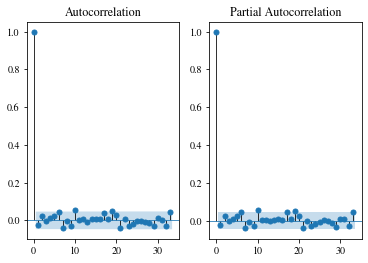

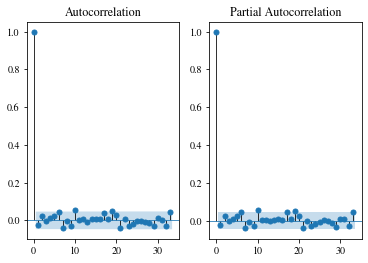

In [6]:
# ACF und PACF plot für btc_log_diff1
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig_2, axes = plt.subplots(1,2)
plot_acf(btc_log_diff1, ax=axes[0])
plot_pacf(btc_log_diff1, ax=axes[1])


In [132]:
# ARIMA(p,1,q) fit: Teste verschiedene Modelle anhand des AIC/BIC/HQIC
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')
def writeARIMA_LaTeX_logs_to_file(p_values, q_values):
    import sys
    old_stdout = sys.stdout
    sys.stdout = open(save_plot_to+'ARIMA_logs_LaTeX.txt', "w")
    
    min_aic, opt_order = float('inf'), None
    for p in p_values:
        for q in q_values:
            current_order = (p, 1, q)
            try:
                model = pm.ARIMA(order=current_order)
                model_fitted = model.fit(np.log(btc), display=False)
                if model_fitted.aic() < min_aic:
                    min_aic, opt_order = model_fitted.aic(), current_order
                print(model_fitted.summary().as_latex(), '\n\n\n')
            except:
                continue
    opt_model = pm.ARIMA(order=opt_order)
    opt_fitted = opt_model.fit(np.log(btc), disp=False)
    
    sys.stdout.close()
    sys.stdout = old_stdout
    print('Best fit: ARIMA{}\nAIC:   {}\nBIC:   {}\nHQIC:  {}'.format(opt_order, opt_fitted.aic, opt_fitted.bic, opt_fitted.hqic))

p_values = [0, 5, 6]
q_values = [0, 5, 10]
writeARIMA_LaTeX_logs_to_file(p_values, q_values)

Best fit: ARIMA(0, 1, 0)
AIC:   <function ARIMA.aic at 0x000001FDB85BB438>
BIC:   <function ARIMA.bic at 0x000001FDB5E279D8>
HQIC:  <function ARIMA.hqic at 0x000001FDB5E27E58>


In [6]:
# Teile btc in 80% Train und 20% Test
train_size = int(len(btc) * 0.8)
train, test = btc[:train_size], btc[train_size:]
print('train:', len(train), '\ntest:', len(test), '\nSUM:', len(train) + len(test), '\nlen btc:', len(btc))

train: 1428 
test: 358 
SUM: 1786 
len btc: 1786


In [134]:
# Plot Result Diagnostic (std. residuals, histogram, qq-plot, correlogram) of optimal model
def plot_model_diagnostics(model_order):
    model = pm.ARIMA(order=model_order)
    model_fitted = model.fit(np.log(train), disp=False)
    model_fitted.plot_diagnostics()

opt_order = (0,1,0)
plot_model_diagnostics(opt_order)

In [7]:
# create returns
returns = btc.pct_change().mul(100).dropna()
returns

Date
2015-08-08   -6.645683
2015-08-09    1.563218
2015-08-10   -0.230119
2015-08-11    2.238439
2015-08-12   -1.483043
                ...   
2020-06-22    3.709197
2020-06-23   -0.197539
2020-06-24   -3.282047
2020-06-25   -0.523964
2020-06-26   -1.099753
Name: Close, Length: 1785, dtype: float64

In [36]:
import pmdarima as pm
model = pm.ARIMA(order=(0,1,0))
model_fitted = model.fit(y=returns, disp=False)
predictions = model_fitted.predict(n_periods= len(test))
resids = model_fitted.resid()

In [30]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
acorr_breusch_godfrey()

AttributeError: 'list' object has no attribute 'resid'

In [44]:
from statsmodels.stats.diagnostic import het_white
result = het_white(model_fitted.resid()[1427:], test.values)

ValueError: White's heteroskedasticity test requires exog tohave at least two columns where one is a constant.

In [41]:
figg, axs = plt.subplots()
axs.plot(returns.values)
axs.plot(predictions, color='red')
axs.plot(resids, zorder=1)
plt.show()

In [135]:
# Einschrittprognose für Test mit ARIMA(0,1,0)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error as mse
import pmdarima as pm

history = [x for x in train]
predicted_values = list()
lo_confint = list()
up_confint = list()

def rolling_forecast(model_order):
    global broke_confint_ctr
    for i in range(len(test)):
        model = pm.ARIMA(order=model_order)
        model_fitted = model.fit(y= np.log(history), disp=False)
        model_result = model_fitted.predict(n_periods=1, return_conf_int=True)
        yhat = np.exp(model_result[0][0])
        lo_confval = np.exp(model_result[1][0][0])
        up_confval = np.exp(model_result[1][0][1])
        if yhat > up_confval or yhat < lo_confval:
           broke_confint_ctr += 1
        predicted_values.append(yhat)
        lo_confint.append(lo_confval)
        up_confint.append(up_confval)
        history.append(test[i])

    # print summary
    rmse = np.sqrt(mse(predicted_values, test.values))
    print('Model:\t\t', 'ARIMA', model_order, '\nMSE:\t\t', rmse, '\nAusreißer:\t', broke_confint_ctr)

rolling_forecast(opt_order)

# make series for plotting
index_pred = np.arange(len(train) + 1, len(btc) + 1)
pred_series = pd.Series(predicted_values, index=index_pred)
test_series = pd.Series(test.values, index=index_pred)
lower_band = pd.Series(lo_confint, index=index_pred)
upper_band = pd.Series(up_confint, index=index_pred)

Model:		 ARIMA (0, 1, 0) 
MSE:		 340.105196576871 
Ausreißer:	 0


In [136]:
# Plot Einschrittprognosen für ARIMA(0,1,0)
import pylab
def plot_rolling_forecast():
    fig_3 = pylab.plot(train.values, label= r'$X_T$')
    pylab.plot(pred_series, label= r'$\hat{X}_{T+h}$')
    pylab.plot(test_series, label= r'$X_{T+h}$')
    pylab.fill_between(lower_band.index, lower_band, upper_band, color='k', alpha=0.1)
    pylab.legend(loc='upper left')
    pylab.title('Einschrittprognose ARIMA(0,1,0)')

plot_rolling_forecast()